# Project: Communicate Data Findings - Lyft Bay Wheels

## Table of Contents

- [Introduction](#intro)
- [1. Data Wrangling](#wrangling)
  - [1.1 Data Gathering](#gathering)
  - [1.2 Data Assessing: Tidiness](#assessing-tidi)  
  - [1.3 Data Cleaning: Tidiness](#cleaning-tidi)
  - [1.4 Data Assessing: Quality](#assessing-qual)
  - [1.5 Data Cleaning: Quality](#cleaning-qual)
- [2. Data Exploration](#exploration)
  - [2.1 Univariate Exploration](#univariate)
  - [2.2 Bivariate Exploration](#bivariate)
  - [2.2 Multivariate Exploration](#multivariate)
- [3. Conclusion](#conclusion)

<a id='intro'></a>
# Introduction

### Bay Wheels

Bay Wheels is a public bicycle sharing company in the San Francisco Bay Area, California owned by the ridesharing company **Lyft Inc**. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States.


It was established as **Bay Area Bike Share** in August 2013. In June 2017, the system was re-launched as **Ford GoBike** in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, it was renamed to **Bay Wheels** in June 2019.

### The Fleet

As of January 2018, the Bay Wheels system had **over 2,600 bicycles in 262 stations** across San Francisco, East Bay and San Jose.

The Bay Wheels fleet consists of two kinds of bicycles:

1. **Classic**
2. **Hybrid** (electric-assist)

### Pricing

The bicycles are available 24 hours a day, seven days a week for periods ranging from a single ride (up to 30 minutes) to a day pass. In January 2018, the Bay Wheels system had about 10,000 annual subscribers.

There are two types of Lyft service users:

**1. Subscribers**


- Annual membership: \$149/year
- Benefits:
  - 45 mins of ride time vs. 30 mins for Customers
  - Unlimited rides up to 45 mins in duration
  - E-bike upgrade for $0.15/min
- Day pass available for \$10/day

**2. Customers**


- No fixed costs
- First 30 mins: \$2
- Additional 15 mins: \$2
- Day pass available for \$10/day

<a id='wrangling'></a>
# 1. Data Wrangling

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from geopy import distance

import requests
import os
import zipfile

# Suppress warnings
import warnings
warnings.simplefilter("ignore")

# Set base options
sns.set(style='darkgrid')
base_color = sns.color_palette()[0]

<a id='gathering'></a>
## 1.1 Data Gathering

In [2]:
# Create folder if it doesn't already exist
os.chdir('/Users/frederikschmidt/Python-Notebooks/Data-Analyst-Nanodegree/5-Data-Visualization/Project 5 - Communicate Data Findings')
folder_name = 'bay-wheels-data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
# Manually add the url of every zip file to a list
bay_wheels_url = ['https://s3.amazonaws.com/baywheels-data/2017-fordgobike-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201812-fordgobike-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201910-baywheels-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201911-baywheels-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/202001-baywheels-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/202002-baywheels-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/202003-baywheels-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/202004-baywheels-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/202005-baywheels-tripdata.csv.zip',
                  'https://s3.amazonaws.com/baywheels-data/202006-baywheels-tripdata.csv.zip']

In [4]:
# Save every zip file in the folder created above
for url in bay_wheels_url:
    response = requests.get(url)
    with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)

In [5]:
# Go to the folder and unzip the zip files in the folder
os.chdir(folder_name)
for url in bay_wheels_url:
    with zipfile.ZipFile(url.split('/')[-1], 'r') as myzip:
        myzip.extractall()

<a id='assessing-tidi'></a>
## 1.2 Data Assessing: Tidiness

The data is split into different datasets. Before merging the data, we should make a first assessment of the data by checking whether the columns of the individual datasets differ.

In [6]:
# Create a list of the csv files
csv_files = []

for elem in bay_wheels_url:
    # Select the last part of the url and remove '.zip'
    csv_files.append(elem.split('/')[-1][:-4])

In [7]:
# List name, number of columns and columns of every file
i = 1
for file in csv_files:
    df = pd.read_csv(file)
    print('File {0}: {1} --- Columns: {2}'.format(i, file, len(df.columns)))
    print(list(df.columns))
    print('')
    i = i + 1

File 1: 2017-fordgobike-tripdata.csv --- Columns: 13
['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type']

File 2: 201801-fordgobike-tripdata.csv --- Columns: 14
['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'bike_share_for_all_trip']

File 3: 201802-fordgobike-tripdata.csv --- Columns: 14
['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'bike_share_for_all_trip']

File 4: 201803-fordgobike-tripdat

**Findings:**

- The datasets have 13 to 15 columns.
- The last three files `202004-baywheels-tripdata.csv`, `202005-baywheels-tripdata.csv` and `202006-baywheels-tripdata.csv` have **different column names** than the others.
- Some columns contain similar information, e.g. *start_time* appears as *started_at* or *start_station_latitude* as *start_lat*.
- The remaining datasets have the **same columns names**, except for *rental_access_method* and *bike_share_for_all_trip*.

<a id='cleaning-tidi'></a>
## 1.3 Data Cleaning: Tidiness

**Define**

Put the files except for the last three files into a dataframe `df_bike` using `pd.read_csv()` and `pd.concat()`.

**Code**

In [8]:
# Concat the files for all files in csv_files except for the last three
df_bike = pd.concat((pd.read_csv(file) for file in csv_files[:len(csv_files)-3]))

**Test**

In [9]:
# Number of bike rentals in 2019 and number of columns
df_bike.shape

(5795411, 15)

In [10]:
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN,NaN


<a id='assessing-qual'></a>
## 1.4 Data Assessing: Quality

### Duplicated values

In [11]:
df_bike.duplicated().sum()

7512

### Missing values and data types

In [12]:
df_bike.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5795411 entries, 0 to 176798
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             5795411 non-null  int64  
 1   start_time               5795411 non-null  object 
 2   end_time                 5795411 non-null  object 
 3   start_station_id         5216604 non-null  float64
 4   start_station_name       5218438 non-null  object 
 5   start_station_latitude   5795411 non-null  float64
 6   start_station_longitude  5795411 non-null  float64
 7   end_station_id           5214956 non-null  float64
 8   end_station_name         5216782 non-null  object 
 9   end_station_latitude     5795411 non-null  float64
 10  end_station_longitude    5795411 non-null  float64
 11  bike_id                  5795411 non-null  int64  
 12  user_type                5795411 non-null  object 
 13  bike_share_for_all_trip  4127445 non-null  

### Summarized findings


**Duplicated values:**


1. There are duplicated values in `df_bike`.


**Missing values:**


2. Missing values in *rental_access_method*.
3. Missing values in *bike_share_for_all_trip*.
4.  Missing values in *start_station_id*, *start_station_name*, *end_station_id* and *end_station_name*.


**Date types:**


5. Date columns *start_time* and *end_time* have data type 'object'.
6. Integer columns *start_station_id* and *end_station_id* have data type 'float'.

<a id='cleaning-qual'></a>
## 1.5 Data Cleaning: Quality

In [13]:
# Create a copy of df_bike
df_clean = df_bike.copy()

### Duplicated values

**1. There are duplicated values in `df_bike`.**

**Define**

Drop duplicated values using `pd.DataFrame.drop_duplicates()`.

**Code**

In [14]:
df_clean = df_clean.drop_duplicates()

**Test**

In [15]:
# Number of dropped values
len(df_bike)-len(df_clean)

7512

### Missing values

In [16]:
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5787899 entries, 0 to 176798
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             5787899 non-null  int64  
 1   start_time               5787899 non-null  object 
 2   end_time                 5787899 non-null  object 
 3   start_station_id         5215458 non-null  float64
 4   start_station_name       5217292 non-null  object 
 5   start_station_latitude   5787899 non-null  float64
 6   start_station_longitude  5787899 non-null  float64
 7   end_station_id           5213803 non-null  float64
 8   end_station_name         5215629 non-null  object 
 9   end_station_latitude     5787899 non-null  float64
 10  end_station_longitude    5787899 non-null  float64
 11  bike_id                  5787899 non-null  int64  
 12  user_type                5787899 non-null  object 
 13  bike_share_for_all_trip  4127445 non-null  

**2. Missing values in *rental_access_method*.**

- There are only 731,184 non-null values in *rental_access_method*. As shown earlier, *rental_access_method* exists only in some of the csv files.

**Define**

Drop the column from `df_clean`.

**Code**

In [17]:
df_clean = df_clean.drop(['rental_access_method'], axis=1)

**Test**

In [18]:
list(df_clean.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'bike_share_for_all_trip']

**3. Missing values in *bike_share_for_all_trip*.**

- There are over 4,000,000 valid observations in *bike_share_for_all_trip*.

In [19]:
df_clean['bike_share_for_all_trip'].value_counts()

No     3787538
Yes     339907
Name: bike_share_for_all_trip, dtype: int64

In [20]:
# Extract year, month, week, day, weekday, hour from date to be able to group by
df_clean['year'] = pd.DatetimeIndex(df_clean['start_time']).year
df_clean['month'] = pd.DatetimeIndex(df_clean['start_time']).month
df_clean['week'] = pd.DatetimeIndex(df_clean['start_time']).week
df_clean['day'] = pd.DatetimeIndex(df_clean['start_time']).day
df_clean['hour'] = pd.DatetimeIndex(df_clean['start_time']).hour

# The week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6
df_clean['weekday'] = pd.DatetimeIndex(df_clean['start_time']).weekday
df_clean['weekday'] = df_clean['weekday'].replace({0: 'Monday',
                                                   1: 'Tuesday',
                                                   2: 'Wednesday',
                                                   3: 'Thursday',
                                                   4: 'Friday',
                                                   5: 'Saturday',
                                                   6: 'Sunday'})

# Convert weekday to ordinal type
ordered_var = pd.api.types.CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday',
                                                        'Thursday', 'Friday', 'Saturday',
                                                        'Sunday'], ordered=True)
df_clean['weekday'] = df_clean['weekday'].astype(ordered_var)

- As seen earlier, *bike_share_for_all_trip* data is available only **between January 2018 and November 2019**, with some missing values in these months (see output below).

In [21]:
# Number of missing values in bike_share_for_all_trip grouped by year and month
df_clean['bike_share_for_all_trip'].isnull().groupby(
    [df_clean['year'], df_clean['month']]).sum().astype(int).reset_index(
    name='bike_share_for_all_trip')

,year,month,bike_share_for_all_trip
0,2017,6,2689
1,2017,7,44073
2,2017,8,83292
3,2017,9,98558
4,2017,10,108937
5,2017,11,95612
6,2017,12,86539
7,2018,1,0
8,2018,2,0
9,2018,3,0


**Define**

Keep *bike_share_for_all_trip* and do not replace the missing values. Note: When drawing conclusions using *bike_share_for_all_trip*, we should keep in mind that the conclusions don't address the entire time frame.

**4. Missing values in *start_station_id*, *start_station_name*, *end_station_id* and *end_station_name*.**

- The number of missing values in *start_station_id*, *start_station_name*, *end_station_id* and *end_station_name* is very similar.

In [22]:
for column in ['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name']:
    print(column+':', df_clean[column].isna().sum())

start_station_id: 572441
start_station_name: 570607
end_station_id: 574096
end_station_name: 572270


- Maybe the missing values come from only one file, i.e. from one month?

In [23]:
# Create base dataframe with ordered year and month
missing_df = df_clean.groupby(['year','month']).count().reset_index()[['year', 'month']]
# Add number of missing values grouped by the four columns of interest
for col in ['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name']:
    missing_df[col] = df_clean[col].isnull().groupby(
        [df_clean['year'], df_clean['month']]).sum().astype(int).reset_index(name=col)[col]
missing_df

,year,month,start_station_id,start_station_name,end_station_id,end_station_name
0,2017,6,0,0,0,0
1,2017,7,0,0,0,0
2,2017,8,0,0,0,0
3,2017,9,0,0,0,0
4,2017,10,0,0,0,0
5,2017,11,0,0,0,0
6,2017,12,0,0,0,0
7,2018,1,0,0,0,0
8,2018,2,0,0,0,0
9,2018,3,0,0,0,0


In [24]:
# Number of bike rides in February 2020
len(df_clean[(df_clean.year == 2020) & (df_clean.month == 2)])

424789

**Findings:**

- It seems like if observations have missing values, then they have missing values in all the four columns.
- The missing values do not appear in one month, i.e. they are not from one file.
- More than 50% of rentals in February 2020 have missing values in these columns (264K of 425K)
- We will not drop the columns since we would lose key information.
- Note: Conclusions for these columns may be misleading, because most missing values are in winter 2019/2020.

### Data types

**5. Date columns *start_time* and *end_time* have data type 'object'.**

**Define**

Change data type to 'datetime' using `pd.to_datetime()`.

**Code**

In [25]:
date_columns = ['start_time', 'end_time']
for column in date_columns:
    df_clean[column] = pd.to_datetime(df_clean[column])

**Test**

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5787899 entries, 0 to 176798
Data columns (total 20 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  year                     int64         
 15  month                    int64         
 16  week                     int64         
 17  day                      int

### Additional data cleaning

**6. `df_clean` contains bike rides from April 1st, 2020**

In [27]:
len(df_clean[df_clean['start_time'] >= '2020-04-01'])

1732

In [28]:
len(df_clean[df_clean['start_time'] >= '2020-04-02'])

0

**Define**

Drop the bike rides after April 1st, 2020 to come up with bike rides until March 31st, 2020.

**Code**

In [29]:
df_clean = df_clean[df_clean['start_time'] < '2020-04-01']

**Test**

In [30]:
df_clean['start_time'].sort_values(ascending=False)[:5]

68382    2020-03-31 23:59:51.000
3        2020-03-31 23:55:00.426
62699    2020-03-31 23:53:57.000
119008   2020-03-31 23:53:17.000
133610   2020-03-31 23:52:25.000
Name: start_time, dtype: datetime64[ns]

### Structure of the dataset

- The cleaned database analyzed in the project captures **~5,800,000 bike rides from Juny 26th 2017 to March 31st 2020**.

- The following information is available for a bike ride:
  - Duration in seconds
  - Start time
  - End time
  - Start station ID, start station name
  - Start station latitude, start station longitude
  - End station ID, end station name
  - End station latitude, end station longitude
  - Bike ID
  - User type
  - Bike share for all trip
  
- Data types:
  - Datetime: Start time, end time
  - Numerical: e.g. Duration in seconds, start station ID, end station ID 
  - Categorical: User type, weekday, weekday or not (binary)

In [31]:
# Save df_clean to csv file
os.chdir('/Users/frederikschmidt/Python-Notebooks/Data-Analyst-Nanodegree/5-Data-Visualization/Project 5 - Communicate Data Findings')
df_clean.to_csv('df_bikesharing_all.csv', header=True, index=False)

<a id='exploration'></a>
# 2. Data Exploration

<a id='univariate'></a>
## 2.1 Univariate Exploration

### 2.1.1. Duration of bike rides

- How long do users ride the bikes?

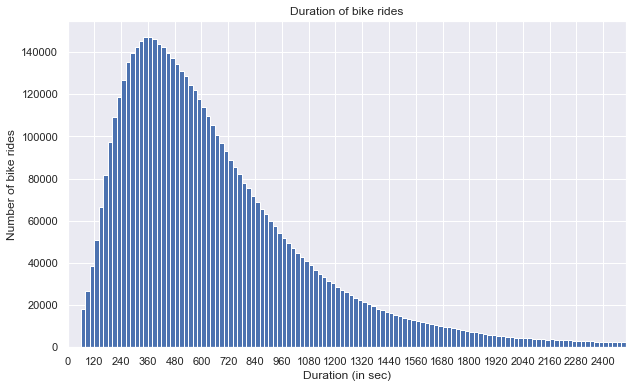

In [32]:
treshold = 2500
x_ticks = np.arange(0, treshold, 120)
bin_size = np.arange(0, treshold+20, 20)

plt.figure(figsize=(10,6))
plt.hist(df_clean['duration_sec'][df_clean['duration_sec'] <= treshold], bins=bin_size)
plt.title('Duration of bike rides')
plt.xlabel('Duration (in sec)'), plt.ylabel('Number of bike rides')
plt.xticks(x_ticks, x_ticks), plt.xlim(0, treshold);

In [33]:
df_clean['duration_sec'].describe()

count    5.786167e+06
mean     8.495146e+02
std      2.235196e+03
min      6.000000e+01
25%      3.600000e+02
50%      5.710000e+02
75%      8.930000e+02
max      9.121100e+05
Name: duration_sec, dtype: float64

**Findings:**

- The distribution of the duration of bike rides is unimodal and skewed to the right. 
- The center of the distribution is at about 360 seconds.
- Most people use the bikes **between 120 seconds and 1200 seconds**.
- There is a long tail of longer bike rides.
- For visual purposes, the plot only displays bike rates up to 20 minutes. The longest bike rental took about **90,000 seconds** which is slightly more than 24 hours.

### 2.1.2 Bike usage over the week

- How does the usage vary across days of the week?
- Do more people use the service at the weekend (e.g. tourists)?

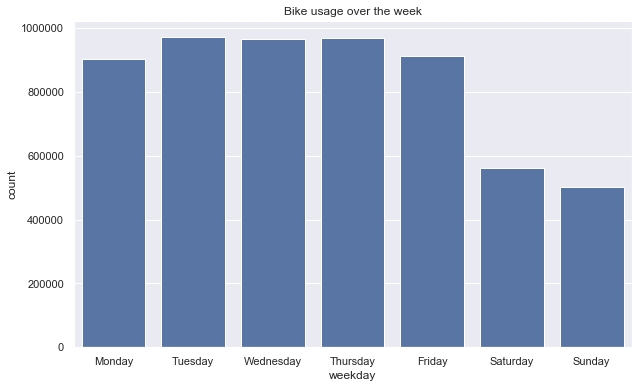

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, x='weekday', color=base_color)
plt.title('Bike usage over the week');

**Finding:**

- There is a difference between weekend and in the week. The Bay Wheels service is **less popular at the weekend**.
- As of March 2019, the total number of tracked bike rides during the week is about **900K for every day**, compared to about **500K for every day** at the weekend.
- The service might be popular for commuters. The distribution of bike usage over the day may yield insights into this.

### 2.1.3 Bike usage over the day

- Is there a difference in the usage over the day?
- Do people use the bikes for commuting in the morning and the evening?

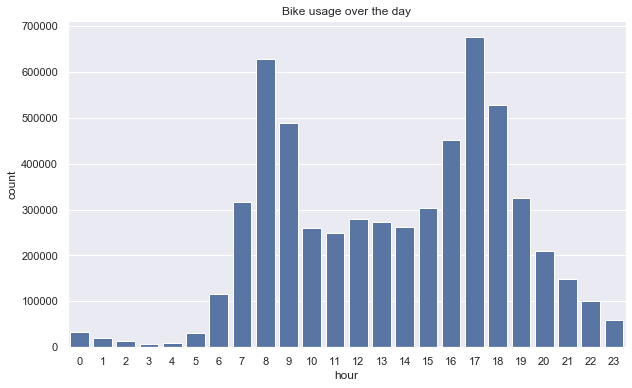

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, x='hour', color=base_color)
plt.title('Bike usage over the day');

**Findings:**

- There are clear peaks at rush hour, i.e. **between 7am and 9am** and **between 4pm and 6pm**, probably due to commuters.
- If this is true, we should see differences in the bike usage over the day when we consider weekdays and weekend separately. This is where **bivariate analysis** will be powerful later on.

### 2.1.4 Share of total bike rides per user type

- How many bike rides can be assigned to Customers and Subscribers?

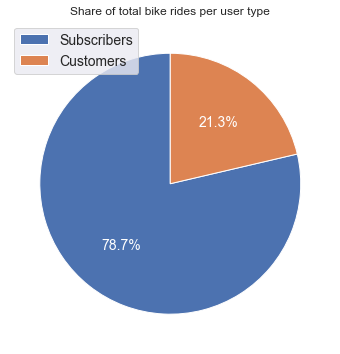

In [36]:
plt.figure(figsize=(10,6))
plt.pie(df_clean['user_type'].value_counts(),
        autopct='%1.1f%%', startangle=90, textprops=dict(color="w", size=14))
plt.legend(['Subscribers', 'Customers'], loc='upper left', fontsize=14, frameon=True)
plt.title('Share of total bike rides per user type');

**Findings:**
- From the 5,800,000 bike rides, about **20%** can be assigned to **Customers** and about **80%** to **Subscribers**.
- Note: This does not indicate that most Bay Wheels users are Subscribers. It simply means that Subscribers account for most trips. Whether or not Subscribers use the service more often cannot be analyzed, because of a missing user ID.

### 2.1.5 Development over time

- How did the average number of rides develop over time?

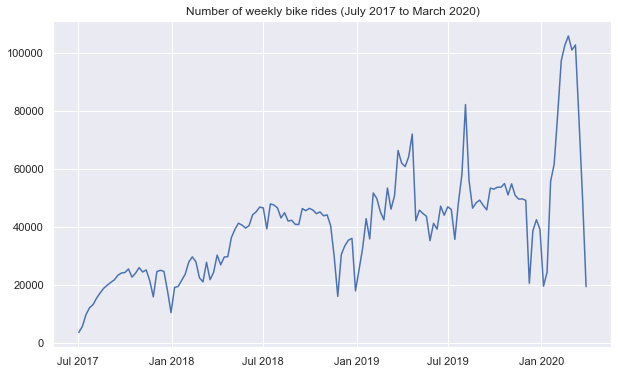

In [37]:
df_time = df_clean.groupby(['year', 'week'])['bike_id'].count().reset_index().rename(
    columns={'bike_id':'count'})

# Convert year and week to date
dates = df_time['year'] * 100 + df_time['week']
df_time['date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')

# Results may be distorted if the last week has less than 7 days and counts as a full week
# Drop incomplete weeks 
df_time = df_time[df_time['date'] < '2020-04-01']

x_ticks_old = [np.datetime64('2017-07'), np.datetime64('2018-01'), np.datetime64('2018-07'),
               np.datetime64('2019-01'), np.datetime64('2019-07'), np.datetime64('2020-01')]
x_ticks_new = ['Jul 2017', 'Jan 2018', 'Jul 2018', 'Jan 2019', 'Jul 2019', 'Jan 2020']

plt.figure(figsize=(10,6))
plt.plot(df_time['date'], df_time['count'])
plt.title('Number of weekly bike rides (July 2017 to March 2020)')
plt.xticks(x_ticks_old, x_ticks_new);

**Finding 1:**

- There is an overall positive trend.


**Finding 2:**

- There are two obvious drops over the year:
  - one in the last year of the week (**Christmas**),
  - and second one about four weeks earlier (**Thanksgiving**).
- The number of bike rentals during these weeks are expected to be lower because of less commuters.
- See below: Indeed, we see that there are almost no peaks in the morning and in the evening in the Christmas week.

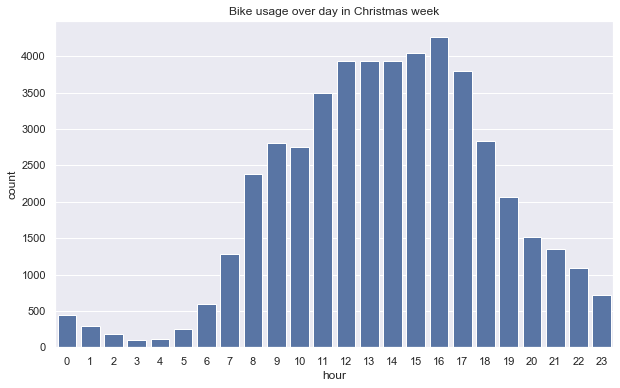

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_clean[(df_clean['week'] == 52)], x='hour', color=base_color)
plt.title('Bike usage over day in Christmas week');

**Finding 3:**

- There is a huge peak and drop in 2020.
- See below: The peak and the drop also appears in the raw data. This may be due to special marketing activities.

In [39]:
os.chdir(folder_name)
for file in csv_files:
    if '2020' in file:
        test = pd.read_csv(file)
        print(file, len(test))

202001-baywheels-tripdata.csv 295854
202002-baywheels-tripdata.csv 432354
202003-baywheels-tripdata.csv 176799
202004-baywheels-tripdata.csv 84259
202005-baywheels-tripdata.csv 138251
202006-baywheels-tripdata.csv 158168


**Finding 4:**
- The plot reveals seasonality over the year: There are more bike rides in the summer.
- Using bivariate analysis later on, we will see if this effect has been stable over the years.

### 2.1.6 Distance traveled

- How is the distance of bike rides distributed? How far do people ride?

The distance of every bike ride can be derived from the start and end coordinates. This is more a fun plot. We expect the distance of a bike ride to be highly correlated with its duration. Most importantly, duration should be the variable of interest since Lyft earns money with trips that are longer in time, not necessarily with trips that are longer in distance.

Note:
- We assume that users directly drive from A to B.
- We do not consider bike rides with the same start and end station (distance would be 0).

In [40]:
# Define what we want to caluclate for every row
def distancer(row):
    coords_1 = (row['start_station_latitude'], row['start_station_longitude'])
    coords_2 = (row['end_station_latitude'], row['end_station_longitude'])
    return distance.distance(coords_1, coords_2).m

# Apply the function to each row in df_clean
df_clean['meter_distance'] = df_clean.apply(distancer, axis=1)

In [41]:
# Multiply distance with factor 1.3 to convert air distance to land distance
df_clean['meter_distance'] = df_clean['meter_distance'] * 1.3

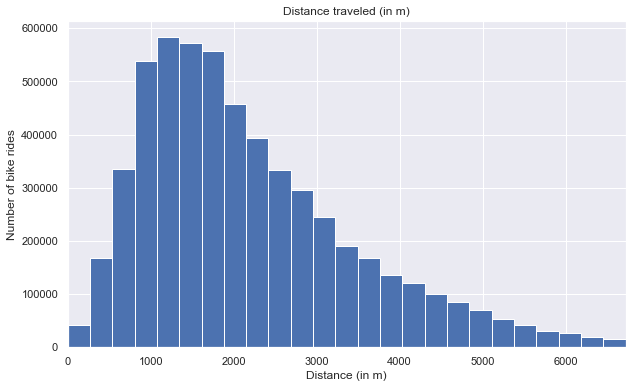

In [42]:
# Do not consider outliers and rides with the same start and end station
plt.figure(figsize=(10,6))
plt.hist(df_clean['meter_distance'][
    (df_clean['meter_distance'] > 0) &
    (df_clean['meter_distance'] <= df_clean['meter_distance'].quantile(0.99))], bins=25)
plt.xlim(0,df_clean['meter_distance'].quantile(0.99))
plt.title('Distance traveled (in m)')
plt.xlabel('Distance (in m)'), plt.ylabel('Number of bike rides');

**Findings:**

- The distribution of the distance traveled is unimodal and skewed to the right.
- As expected, it looks similar to the distribution of the duration.
- The center of the distribution is between approximately 1.2km and 1.6km.
- Most bike rides (with different start and end station) are between **0.5km and 3.0km**.

<a id='bivariate'></a>
## 2.2 Bivariate Exploration

### 2.2.1 Number of bike rides per weekday for Customers and Subscribers

- Are there differences especially between weekend and no weekend?

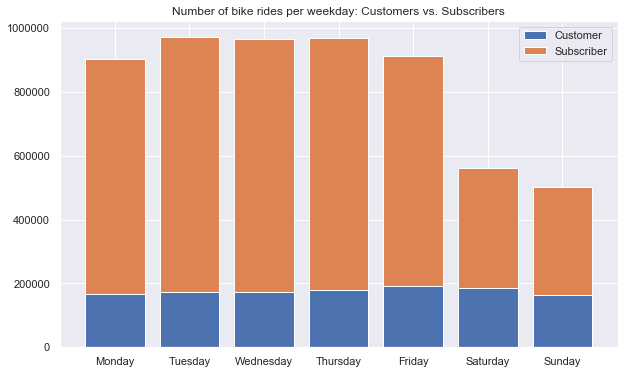

In [43]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
users_order = ['Customer', 'Subscriber']

plt.figure(figsize=(10, 6))
baselines = np.zeros(len(days_order))
# For each second-variable category:
for i in range(len(users_order)):
    # Isolate the counts of Customer and Subscriber
    users = users_order[i]
    # For Customer and Subscriber, count the number of rides per weekday
    inner_counts = df_clean[df_clean['user_type'] == users]['weekday'].value_counts()
    # Plot the counts on top of the accumulated baseline
    plt.bar(x=np.arange(len(days_order)), height=inner_counts[days_order], bottom=baselines)
    # Adjust the baseline for the second group
    baselines += inner_counts[days_order]
plt.xticks(np.arange(len(days_order)), days_order)
plt.legend(users_order)
plt.title('Number of bike rides per weekday: Customers vs. Subscribers');

**Findings:**

- The number of bike rides made by **Customers** is **very stable** over the week.
- For **Subscribers**, there is a **difference** between during the week and weekend.
- At a weekend day, Subscribers only make about 50% of the bike rides they make from Monday to Friday.

### 2.2.2 Bike usage over the day: Weekend vs. no weekend

- In light of the popularity of the service during rush hour, is there a difference between weekend and no weekend?

In [44]:
df_clean['dummy_weekday'] = np.nan
df_clean['dummy_weekday'][(df_clean['weekday'] == 'Saturday') |
                          (df_clean['weekday'] == 'Sunday')] = 'Weekend'
df_clean['dummy_weekday'] = df_clean['dummy_weekday'].fillna('No Weekend')

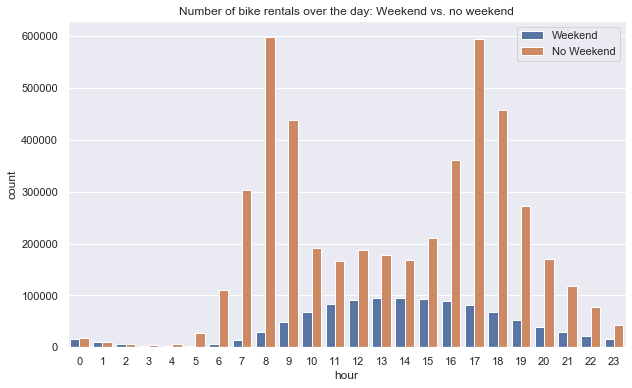

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, x='hour', hue='dummy_weekday')
plt.legend(title=False)
plt.title('Number of bike rentals over the day: Weekend vs. no weekend');

**Findings:**

- The **peaks** in the morning and in the evening only appear **during the week**.
- The distribution of bike rides over the day looks fairly different at the weekend.
- At the **weekend**, the number of bike rides is **distributed smoothly** and achieves a peak between 11am and 4pm.
- In **multivariate exploration**, we will add the user types to see if this holds for both groups.

### 2.2.3 Duration for Customers and Subscribers

- How does the ride time differ between Customers and Subscribers?
- Is there an obvious effect of the 30 min vs. 45 min ride time?

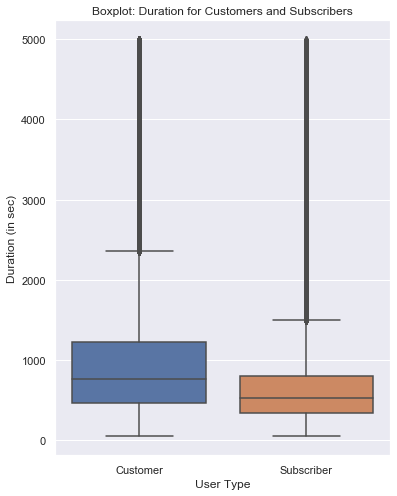

In [46]:
# Do not consider outliers for visual purposes
plt.figure(figsize=(6,8))
sns.boxplot(data=df_clean[df_clean['duration_sec'] < df_clean['duration_sec'].quantile(0.99)],
            x='user_type', y='duration_sec')
plt.xlabel('User Type'), plt.ylabel('Duration (in sec)')
plt.title('Boxplot: Duration for Customers and Subscribers');

In [47]:
# Do not consider outliers
df_clean[df_clean['duration_sec'] < df_clean['duration_sec'].quantile(0.99)].groupby(
    'user_type')['duration_sec'].describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
Customer,1189766.0,973.719893,766.616931,60.0,469.0,762.0,1226.0,4988.0
Subscriber,4538525.0,639.409420,459.540582,60.0,339.0,530.0,805.0,4988.0


**Findings:**

- Note: For visual purposes, we dropped the last percentile to get rid of outliers. 
- Customers spend more time with a bike than Subscribers.
- On average, **Customers** use a bike for **974 seconds** or about 15 minutes, compared to **Subscribers** with only **639 seconds** or 10 minutes.
- The median duration of a bike rental is 762 seconds while Subscribers have a median rental time of only 530 seconds.
- The day pass option may be more popular among Customers (e.g. tourists) and affect the duration.

### 2.2.4 Monthly bike rentals for 2018 and 2019

- Are the patterns in 2018 and 2019 identical or can we observe signs that operations have changed based on 2018 data?

Note: With 2018 and 2019, only years with complete data have been selected to be able to compare absolute numbers.

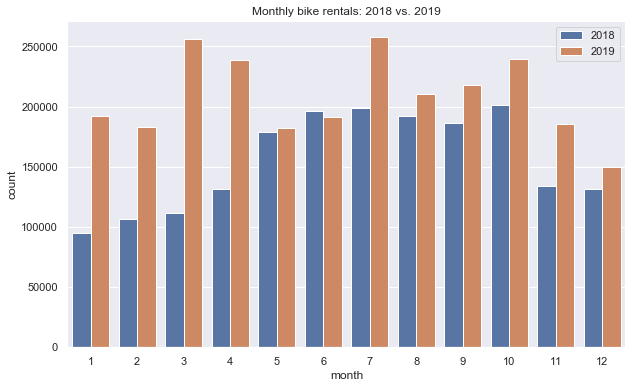

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_clean[(df_clean['year'] == 2018) | (df_clean['year'] == 2019)],
              x='month', hue='year')
plt.title('Monthly bike rentals: 2018 vs. 2019')
plt.legend(title=False);

**Findings:**

- There were overall more bike rentals in 2019 than in 2018 (**business growth**).
- There are differences in the patterns between 2018 and 2019:
  - In **2018**, users consistently did more bike rides in the summer months.
  - In **2019**, there were peaks in **March and October** and the service was equally popular in January and June.

<a id='multivariate'></a>
## 2.3 Multivariate Exploration

### 2.3.1 Hourly service usage per day for both user types

- Are there differences in the service usage for both user types?
- Do Subscribers mostly use the service for commuting and Customers for sightseeing or other activities during the day?

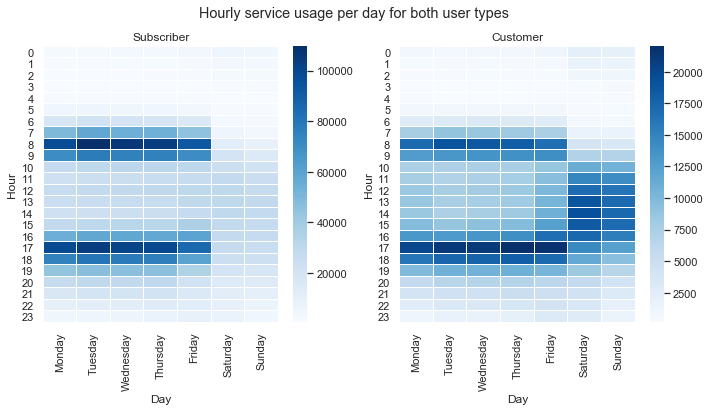

In [49]:
# Create figure
plt.figure(figsize=(10,6))
plt.suptitle('Hourly service usage per day for both user types')
# Put each heatmap into a subplot
for index, value in enumerate(['Subscriber', 'Customer']):
    plt.subplot(1,2,index+1)
    heatmap = df_clean[df_clean['user_type'] == value].groupby(
        ['user_type', 'hour', 'weekday'])['bike_id'].count().unstack().droplevel(level=0)
    sns.heatmap(heatmap, cmap='Blues', linewidths=0.01)
    plt.title('{}'.format(value)), plt.xlabel('Day'), plt.ylabel('Hour')
    plt.yticks(rotation=0)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust subplots to avoid overlap

**Findings:**

- Note: The color maps of both subplots have very different scales.
- **Subscribers** mostly use the service **during the week** for commuting in the morning and the evening. The bikes are used less at the weekend and during the day.
- **Customers** use the service **during the week** in the morning and the evening as well. The bikes are very popular for Customers **at the weekend**, too.

### 2.3.2 Average ride duration per day for both user types

- Are there differences in the duration of bike rides per weekday among both user types?

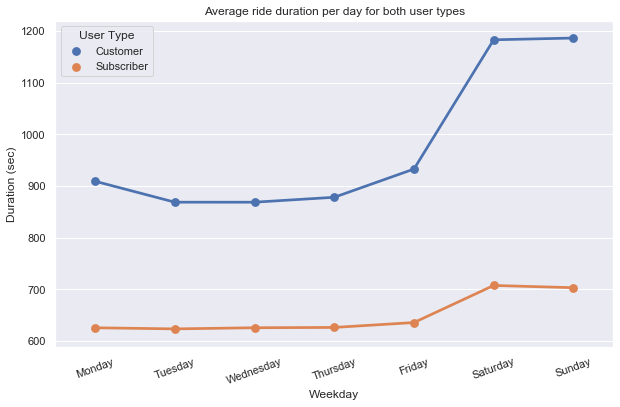

In [50]:
# Do not consider outliers for visual purposes
plt.figure(figsize=(10,6))
sns.pointplot(data=df_clean[df_clean['duration_sec'] <= df_clean['duration_sec'].quantile(0.99)],
            hue='user_type', y='duration_sec', x='weekday');
plt.xticks(rotation=20)
plt.legend(title='User Type')
plt.title('Average ride duration per day for both user types')
plt.xlabel('Weekday'), plt.ylabel('Duration (sec)');

**Findings:**

- Both user types make **longer trips at the weekend**. The difference is larger for Customers.
- This may be the affected by **day passes** which are expected to be popular at the weekend.

<a id='conclusion'></a>
# 3. Conclusion

## Summary

**Duration:**
- Most people use the bikes between 120 seconds and 1200 seconds.

**Over the day:**
- There are clear peaks at rush hour, i.e. between 7am and 9am and between 4pm and 6pm.

**Over the week:**
- The Bay Wheels service is all in all less popular at the weekend.<br>

**Over the year:**
- All in all, there are more bike rides in summer.
- In 2018, users did consistently more bike rides in the summer months.
- In 2019 however, there were peaks in March and October and the service was equally popular in January and June.
  - The differences in the popularity between 2018 and 2019 could be affected by:
    - **Marketing activities** (Lyft may have pushed the service in winter based on the learnings from 2018) 
    - **Weather** (temperature, precipitation)
    - **Other transportation methods** (e.g. strike of public transportation service employees)
- Visualizations show clear drops in the Christmas and the Thanksgiving week (holidays and less commuters).

**User types:**
- **Subscribers:**
  - Account for 80% of all bike rides
  - Mostly use the service during the week for commuting
  - 50% less bike rides at a weekend day compared to a day from Monday to Friday.

- **Customers:**
  - Account for 20% of all bike rides
  - Use the service for commuting but also at the weekend
  - Spend more time with a bike than Subscribers

## Business Decisions

- Lyft should seek to **achieve a high utilization** of the bikes in their fleet. There may be potential in winter months although Lyft was able to balance the utilization well in 2019).
- **Subscribers** want to get from A to B as quick as possible. They may be interested in faster options: The use of **e-bikes** may be pushed here. This will generate additional revenue.
- At the weekend, there may be potential for selling day passes to **Subscribers**, maybe with a special Subscriber discount.
- Weekend passes in combination with e-bikes, both for **Customers** and **Subscribers**, would increase the radius a service user can reach by bike and create new opportunities.
- **Customers** should be converted **Subscribers** in order to generate recurring revenues. This would increase customer retention and could be effective especially for the customers that use the service for commuting.
- Lyft can reach existing users conveniently and at a low cost via the app.


- Beyond that, Lyft should obviously seek to **increase the customer base**, e.g. with special promotions.
- The bike market, especially the e-bike market, is rising in Europe. There is lots of potential in the US as well.

## Resources

- Data source: https://www.lyft.com/bikes/bay-wheels/system-data
- Pricing: https://www.lyft.com/bikes/bay-wheels/pricing
- Additional information: https://en.wikipedia.org/wiki/Bay_Wheels